In [1]:
!pip install pyspedas


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# Example of FAC-Xgse matrix generation and rotation
translates from gse or gsm into FAC

X Axis = on plane defined by Xgse - Z

Second coordinate definition: Y = Z x X_gse

Third coordinate, X completes orthogonal RHS (right hand system) triad: XYZ

Note: X_gse is a unit vector pointing in direction from earth to the sun

In [2]:
from pytplot import timespan
timespan('2007-03-23', 1, keyword='days')

In [3]:
from pyspedas import themis
themis.state(probe='c')
themis.fgm(probe='c', coord='dsl', level='l2')

12-Apr-25 12:30:47: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l1/state/2007/
12-Apr-25 12:30:47: File is current: themis_data/thc/l1/state/2007/thc_l1_state_20070323_v03.cdf
12-Apr-25 12:30:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:30:48: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf


['thc_fgs_btotal',
 'thc_fgs_dsl',
 'thc_fgl_btotal',
 'thc_fgl_dsl',
 'thc_fgh_btotal',
 'thc_fgh_dsl',
 'thc_fge_btotal',
 'thc_fge_dsl']

In [4]:
from pytplot import tsmooth
tsmooth('thc_fgs_dsl', 601, newname='thc_fgs_dsl_sm601')

12-Apr-25 12:31:20: tsmooth was applied to: thc_fgs_dsl_sm601


['thc_fgs_dsl_sm601']

In [5]:
from pyspedas import fac_matrix_make
fac_matrix_make('thc_fgs_dsl_sm601', other_dim='Xgse', newname='thc_fgs_dsl_sm601_fac_mat')

'thc_fgs_dsl_sm601_fac_mat'

In [6]:
from pyspedas import tvector_rotate
tvector_rotate('thc_fgs_dsl_sm601_fac_mat', 'thc_fgs_dsl', newname='thc_fgs_facx')

['thc_fgs_facx']

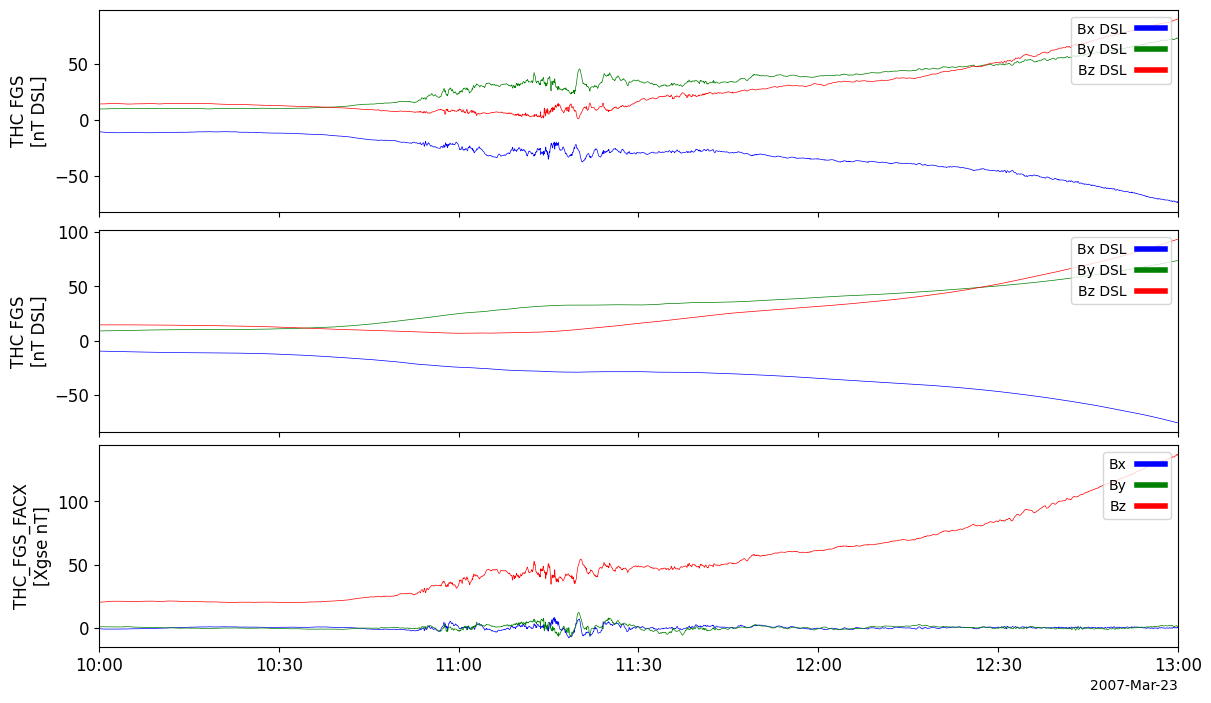

In [7]:
from pytplot import tplot, tlimit, options
tlimit(['2007-03-23/10:00:00','2007-03-23/13:00:00'])
options('thc_fgs_facx', 'ytitle', 'THC_FGS_FACX')
options('thc_fgs_facx', 'ysubtitle', '[Xgse nT]')
options('thc_fgs_facx', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facx'])

# Example of FAC-Rgeo matrix generation and rotation
translate from geo into FAC using radial position vector

Rgeo is radial position vector, positive radialy outwards.

Second coordinate definition: Y = Z x Rgeo (eastward)

Third coordinate, X completes orthogonal RHS XYZ.

In [8]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:31:22: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:31:22: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:31:56: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [9]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='rgeo', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facRgeo')

12-Apr-25 12:31:56: tinterpol (linear) was applied to: thc_pos-itrp
12-Apr-25 12:31:56: ['gei', 'gse']
12-Apr-25 12:31:56: Running transformation: subgei2gse
12-Apr-25 12:31:56: Setting coordinate system for fac_mat_pos_tmp_gse
12-Apr-25 12:31:56: Output variable: fac_mat_pos_tmp_gse


['thc_fgs_facRgeo']

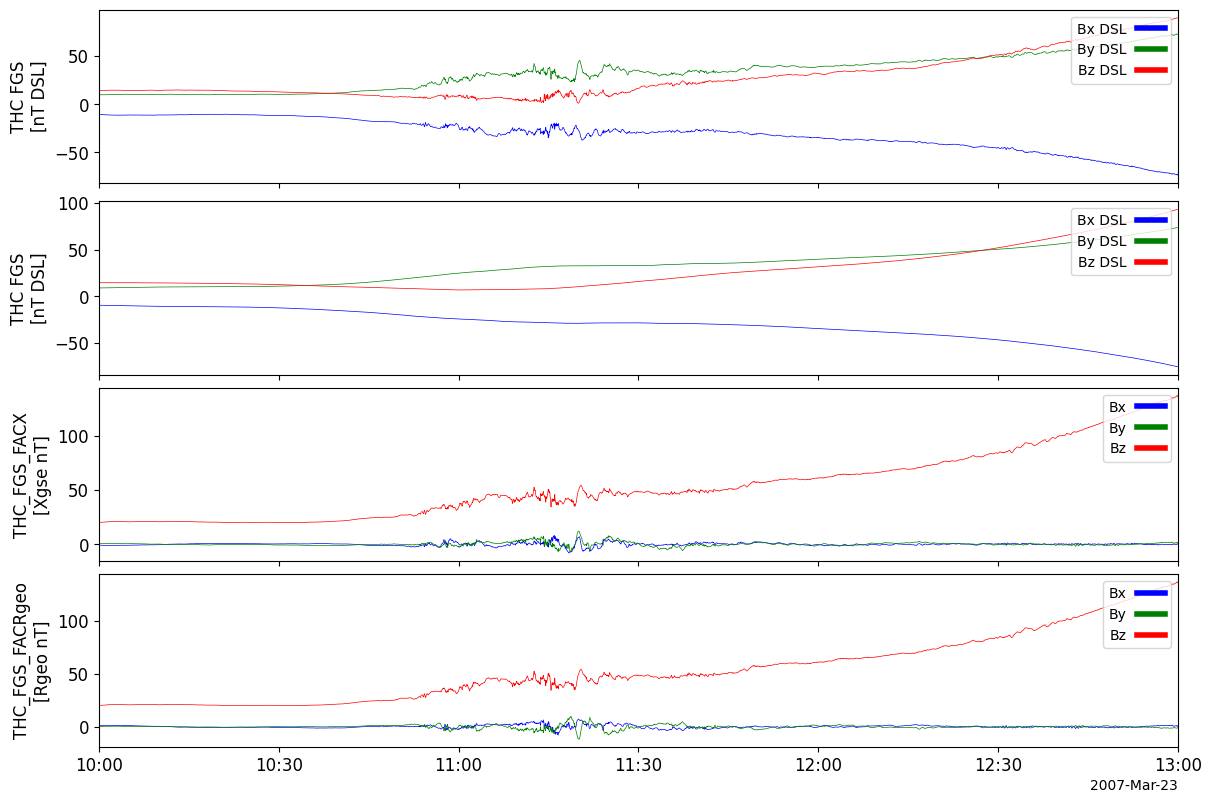

In [10]:
options('thc_fgs_facRgeo', 'ytitle', 'THC_FGS_FACRgeo')
options('thc_fgs_facRgeo', 'ysubtitle', '[Rgeo nT]')
options('thc_fgs_facRgeo', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facx', 'thc_fgs_facRgeo'])

# Example of FAC-mRgeo matrix generation and rotation
translate into FAC using radial position vector

mRgeo is radial position vector, positive radially inwards.

Second coordinate definition: Y = Z x mRgeo (westward)

Third coordinate, X completes orthogonal RHS XYZ.

In [11]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:31:58: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:31:58: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:32:26: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [12]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='mRgeo', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facmRgeo')

12-Apr-25 12:32:26: tinterpol (linear) was applied to: thc_pos-itrp
12-Apr-25 12:32:26: ['gei', 'gse']
12-Apr-25 12:32:27: Running transformation: subgei2gse
12-Apr-25 12:32:27: Setting coordinate system for fac_mat_pos_tmp_gse
12-Apr-25 12:32:27: Output variable: fac_mat_pos_tmp_gse


['thc_fgs_facmRgeo']

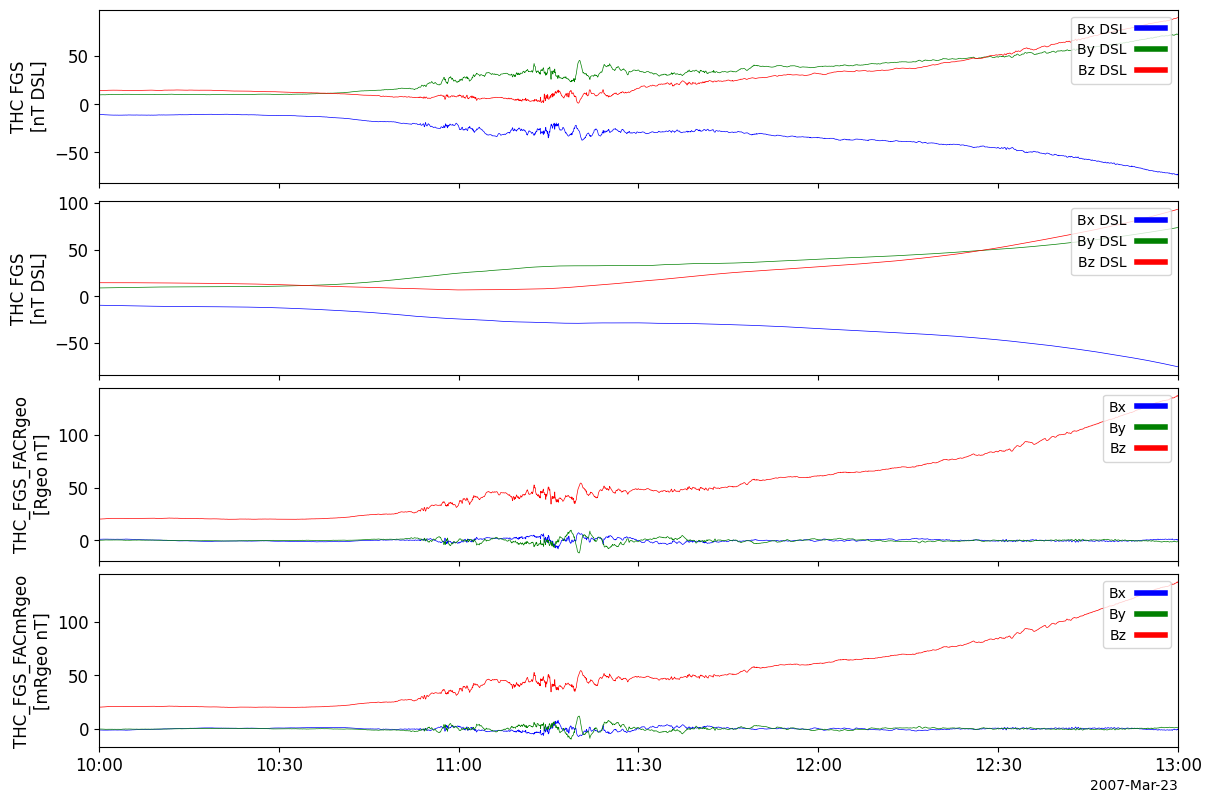

In [13]:
options('thc_fgs_facmRgeo', 'ytitle', 'THC_FGS_FACmRgeo')
options('thc_fgs_facmRgeo', 'ysubtitle', '[mRgeo nT]')
options('thc_fgs_facmRgeo', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facRgeo', 'thc_fgs_facmRgeo'])

# Example of FAC-Phigeo matrix generation and rotation
translate into FAC using azimuthal position vector

Phigeo is the azimuthal geo position vector, positive Eastward

First coordinate definition: X = Phigeo x Z (positive outwards)

Second coordinate, Y ~ Phigeo (eastward) completes orthogonal RHS XYZ

In [14]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:32:28: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:32:29: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:33:01: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [15]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='phigeo', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facPhigeo')

12-Apr-25 12:33:01: tinterpol (linear) was applied to: thc_pos-itrp
12-Apr-25 12:33:01: ['gei', 'gse']
12-Apr-25 12:33:01: Running transformation: subgei2gse
12-Apr-25 12:33:01: Setting coordinate system for fac_mat_pos_tmp_gse
12-Apr-25 12:33:01: Output variable: fac_mat_pos_tmp_gse


['thc_fgs_facPhigeo']

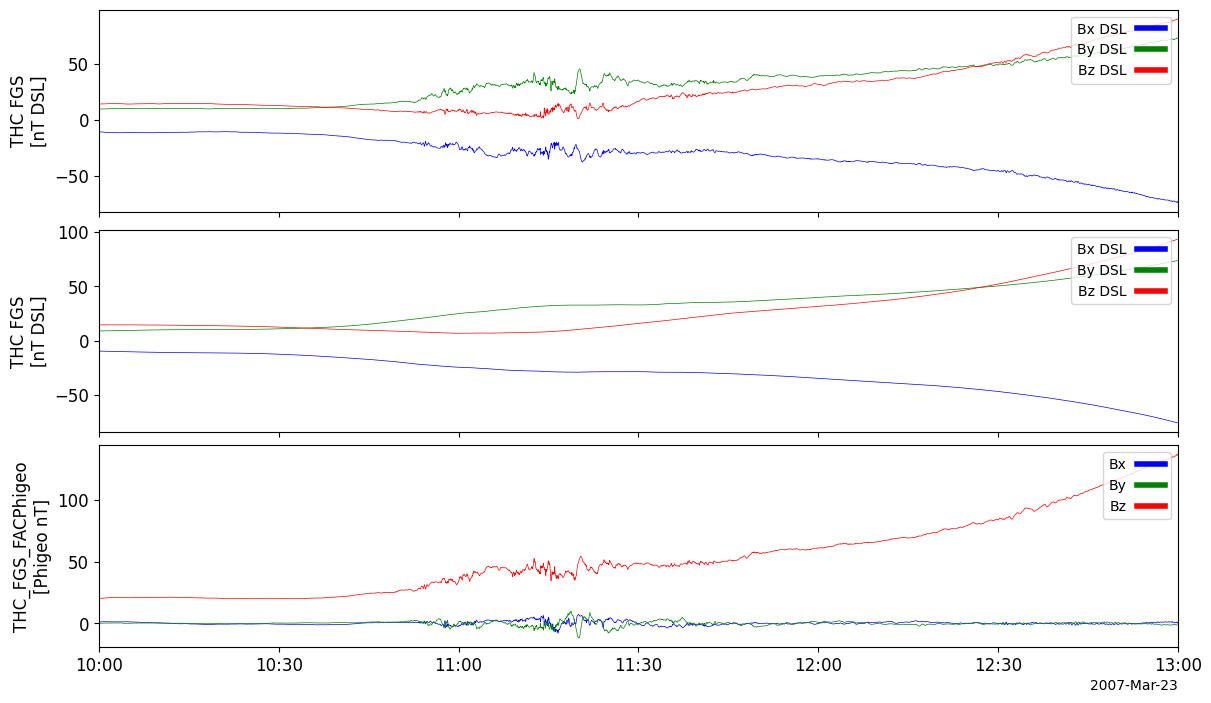

In [16]:
options('thc_fgs_facPhigeo', 'ytitle', 'THC_FGS_FACPhigeo')
options('thc_fgs_facPhigeo', 'ysubtitle', '[Phigeo nT]')
options('thc_fgs_facPhigeo', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facPhigeo'])

# Example of FAC-mPhigeo matrix generation and rotation

translate into FAC using azimuthal position vector

mPhigeo is minus the azimuthal geo position vector; positive Westward

First coordinate definition: X = mPhigeo x Z (positive inwards)

Second coordinate, Y ~ mPhigeo (Westward) completes orthogonal RHS XYZ

In [17]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:33:02: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:33:03: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:33:32: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [18]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='mPhigeo', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facmPhigeo')

12-Apr-25 12:33:32: tinterpol (linear) was applied to: thc_pos-itrp
12-Apr-25 12:33:32: ['gei', 'gse']
12-Apr-25 12:33:32: Running transformation: subgei2gse
12-Apr-25 12:33:32: Setting coordinate system for fac_mat_pos_tmp_gse
12-Apr-25 12:33:32: Output variable: fac_mat_pos_tmp_gse


['thc_fgs_facmPhigeo']

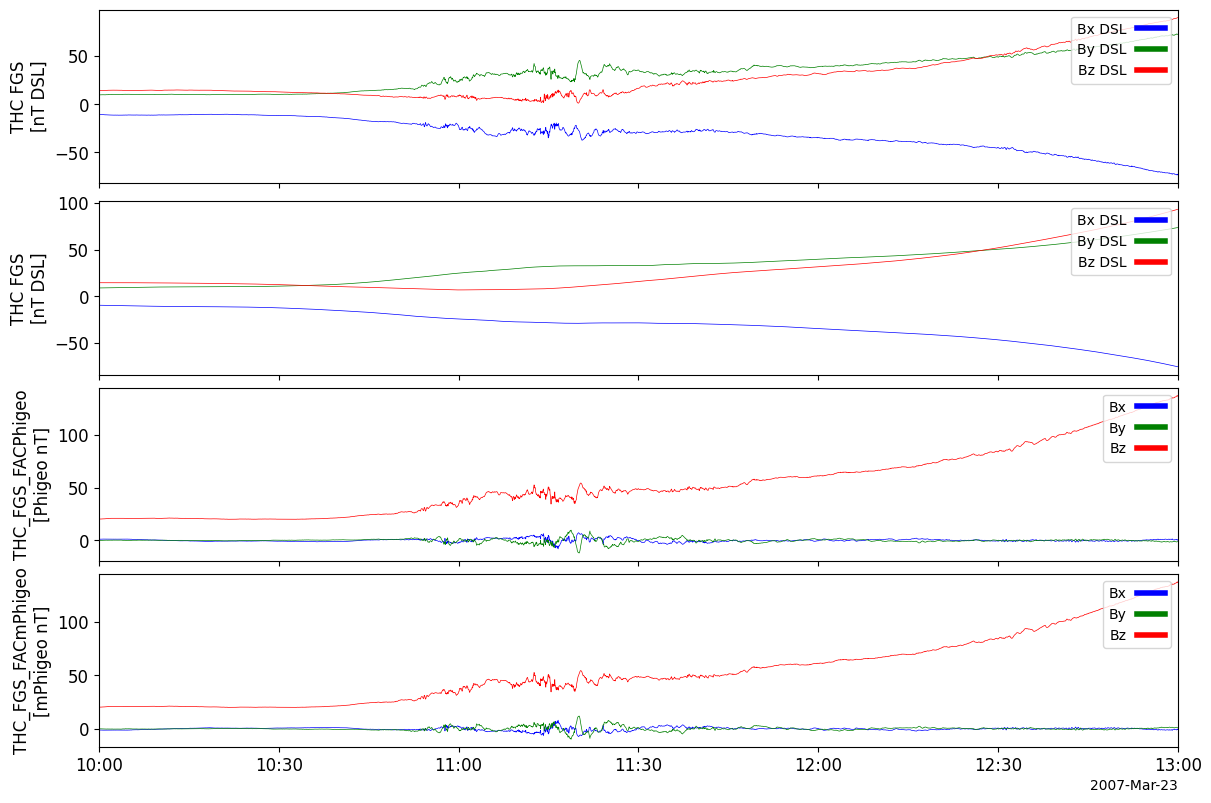

In [19]:
options('thc_fgs_facmPhigeo', 'ytitle', 'THC_FGS_FACmPhigeo')
options('thc_fgs_facmPhigeo', 'ysubtitle', '[mPhigeo nT]')
options('thc_fgs_facmPhigeo', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facPhigeo', 'thc_fgs_facmPhigeo'])

# Example of FAC-Phism matrix generation and rotation

translate into FAC using azimuthal Solar Magnetospheric vector.

Phism is "phi" vector of satellite position in SM coordinates.

Y Axis = on plane defined by Phism-Z, normal to Z

Second coordinate definition: X = Phism x Z

Third completes orthogonal RHS XYZ

In [20]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:33:34: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:33:34: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:34:03: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [21]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='Phism', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facPhism')

12-Apr-25 12:34:03: ['gei', 'gse', 'gsm', 'sm']
12-Apr-25 12:34:03: Running transformation: subgei2gse
12-Apr-25 12:34:03: Running transformation: subgse2gsm
12-Apr-25 12:34:03: Running transformation: subgsm2sm
12-Apr-25 12:34:03: Setting coordinate system for thc_pos-sm
12-Apr-25 12:34:03: Output variable: thc_pos-sm
12-Apr-25 12:34:03: tinterpol (linear) was applied to: thc_pos-sm-itrp
12-Apr-25 12:34:03: ['sm', 'gsm', 'gse', 'gei']
12-Apr-25 12:34:04: Running transformation: subsm2gsm
12-Apr-25 12:34:04: Running transformation: subgsm2gse
12-Apr-25 12:34:04: Running transformation: subgse2gei
12-Apr-25 12:34:04: ['gei', 'gse']
12-Apr-25 12:34:04: Running transformation: subgei2gse
12-Apr-25 12:34:04: Setting coordinate system for fac_mat_pos_tmp_gse
12-Apr-25 12:34:04: Output variable: fac_mat_pos_tmp_gse


['thc_fgs_facPhism']

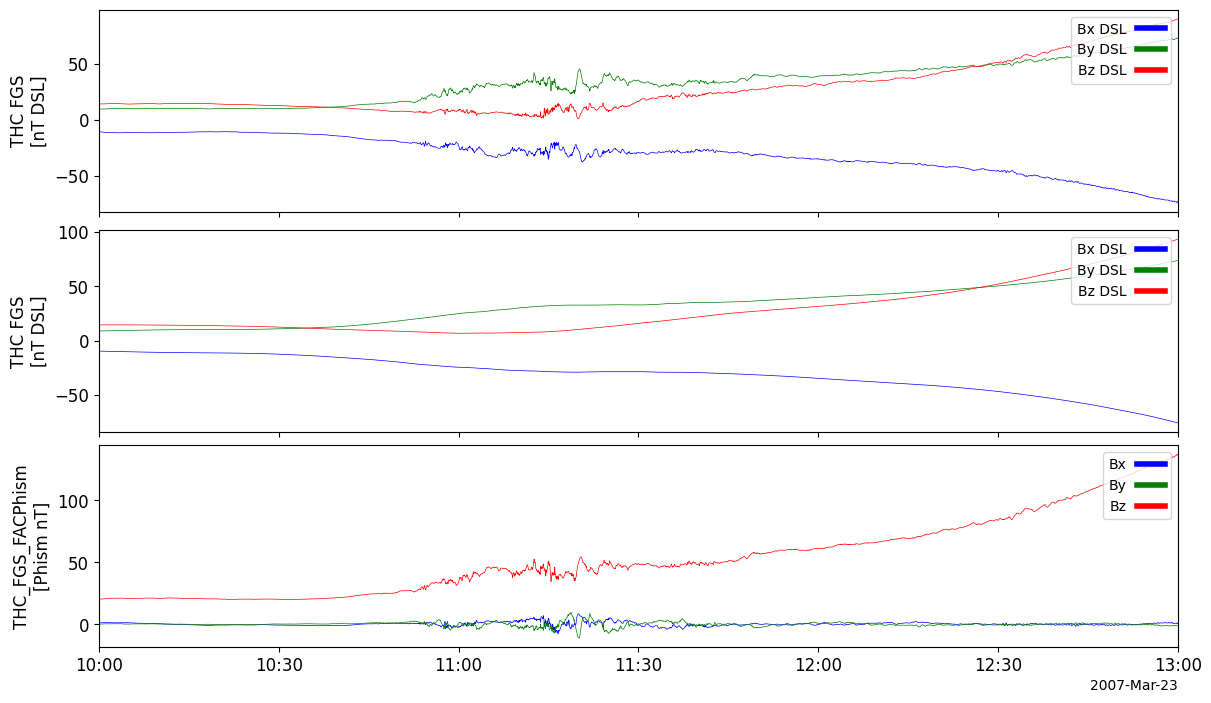

In [22]:
options('thc_fgs_facPhism', 'ytitle', 'THC_FGS_FACPhism')
options('thc_fgs_facPhism', 'ysubtitle', '[Phism nT]')
options('thc_fgs_facPhism', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facPhism'])

# Example of FAC-mPhism matrix generation and rotation

translate into FAC using azimuthal Solar Magnetospheric vector.

mPhism is minus "phi" vector of satellite position in SM coordinates.

Y Axis = on plane defined by Phism-Z, normal to Z

Second coordinate definition: X = mPhism x Z

Third completes orthogonal RHS XYZ

In [23]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:34:05: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:34:05: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:34:34: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [24]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='mPhism', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facmPhism')

12-Apr-25 12:34:34: ['gei', 'gse', 'gsm', 'sm']
12-Apr-25 12:34:34: Running transformation: subgei2gse
12-Apr-25 12:34:34: Running transformation: subgse2gsm
12-Apr-25 12:34:34: Running transformation: subgsm2sm
12-Apr-25 12:34:34: Setting coordinate system for thc_pos-sm
12-Apr-25 12:34:34: Output variable: thc_pos-sm
12-Apr-25 12:34:34: tinterpol (linear) was applied to: thc_pos-sm-itrp
12-Apr-25 12:34:34: ['sm', 'gsm', 'gse', 'gei']
12-Apr-25 12:34:34: Running transformation: subsm2gsm
12-Apr-25 12:34:35: Running transformation: subgsm2gse
12-Apr-25 12:34:35: Running transformation: subgse2gei
12-Apr-25 12:34:35: ['gei', 'gse']
12-Apr-25 12:34:35: Running transformation: subgei2gse
12-Apr-25 12:34:35: Setting coordinate system for fac_mat_pos_tmp_gse
12-Apr-25 12:34:35: Output variable: fac_mat_pos_tmp_gse


['thc_fgs_facmPhism']

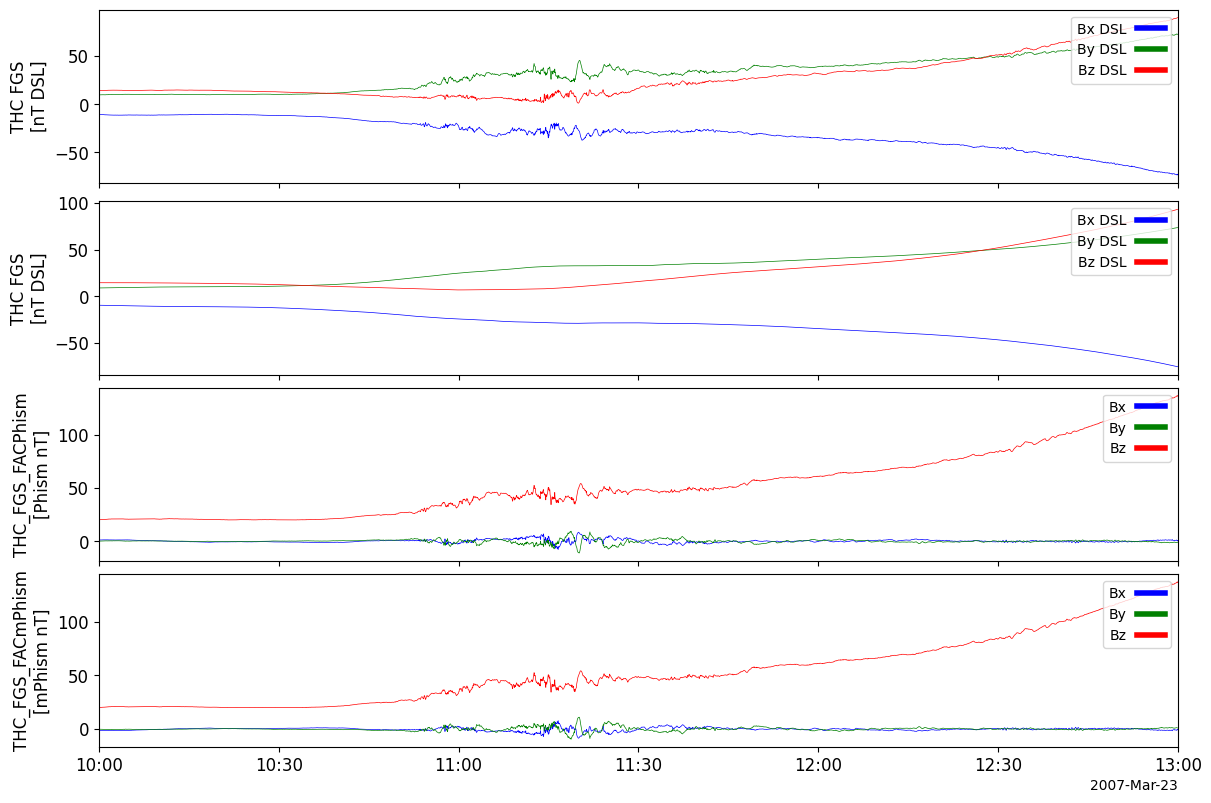

In [25]:
options('thc_fgs_facmPhism', 'ytitle', 'THC_FGS_FACmPhism')
options('thc_fgs_facmPhism', 'ysubtitle', '[mPhism nT]')
options('thc_fgs_facmPhism', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facPhism', 'thc_fgs_facmPhism'])

# Example of FAC-Ygsm matrix generation and rotation

translate into FAC using cartesian Ygsm position as other dimension.

Y Axis on plane defined by Ygsm and Z

First coordinate definition: X = Ygsm x Z

Third completes orthogonal RHS XYZ

In [26]:
themis.fgm(probe='c', coord='gse', level='l2')  #coord cannot be 'dsl' here, otherwise fac_matrix_make will not work
tsmooth('thc_fgs_gse', 601, newname='thc_fgs_gse_sm601')

12-Apr-25 12:34:36: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/themis/thc/l2/fgm/2007/
12-Apr-25 12:34:37: File is current: themis_data/thc/l2/fgm/2007/thc_l2_fgm_20070323_v01.cdf
12-Apr-25 12:35:06: tsmooth was applied to: thc_fgs_gse_sm601


['thc_fgs_gse_sm601']

In [27]:
fac_matrix_make('thc_fgs_gse_sm601', other_dim='ygsm', pos_var_name='thc_pos', newname='thc_fgs_gse_sm601_fac_mat')
tvector_rotate('thc_fgs_gse_sm601_fac_mat', 'thc_fgs_gse', newname='thc_fgs_facy')

12-Apr-25 12:35:06: ['gsm', 'gse']
12-Apr-25 12:35:07: Running transformation: subgsm2gse


['thc_fgs_facy']

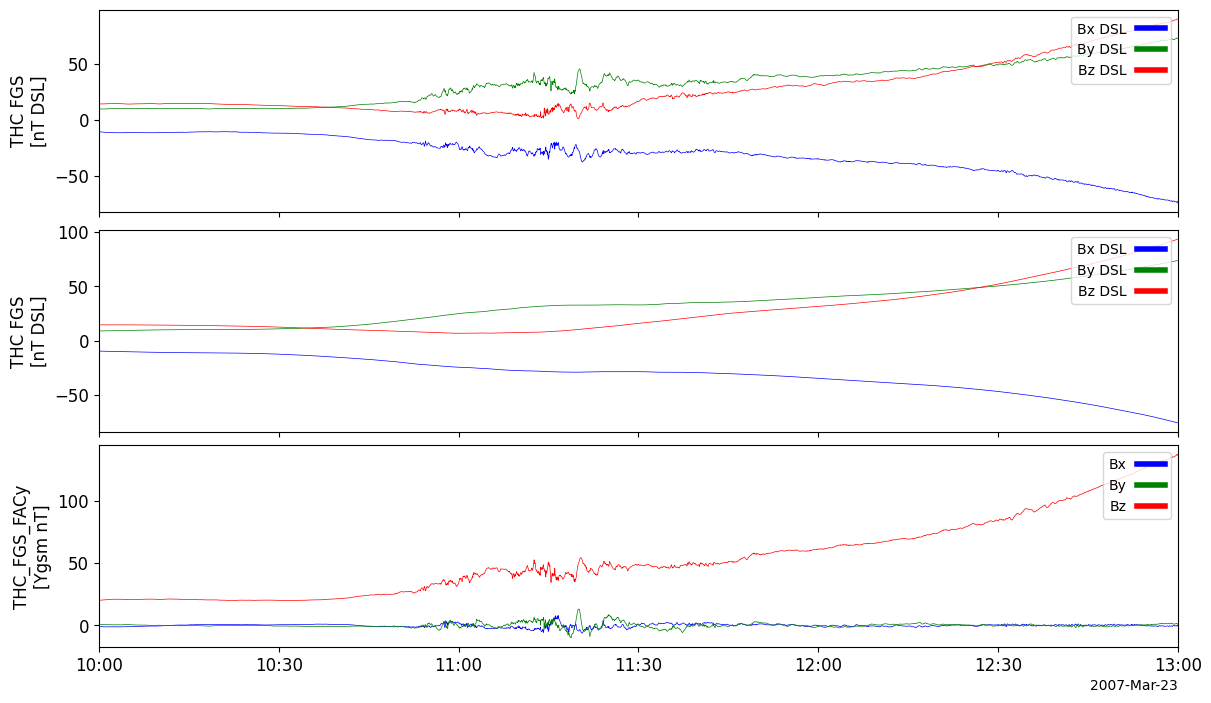

In [28]:
options('thc_fgs_facy', 'ytitle', 'THC_FGS_FACy')
options('thc_fgs_facy', 'ysubtitle', '[Ygsm nT]')
options('thc_fgs_facy', 'labels', ['Bx', 'By', 'Bz'])
tplot(['thc_fgs_dsl', 'thc_fgs_dsl_sm601', 'thc_fgs_facy'])